In [32]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/gathering_affinities.ipynb")

Populating the interactive namespace from numpy and matplotlib


Use pre-made dataframe and just add alternate patients <br>
Would like to also compare with MHC-II

Synthetic populations

In [2]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', 
                        index_col=0)
driver_mutations = list(patient_mutations.columns)

In [4]:
oncogenes = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/allele_matrices/oncogenes.csv', 
                        index_col=0)
tsgenes = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/allele_matrices/tsgenes.csv', 
                        index_col=0)
indels = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/allele_matrices/indels.csv', 
                        index_col=0)
alleleII_df = pd.concat([oncogenes, tsgenes, indels])
alleleII_df = alleleII_df[alleleII_df.mutation.isin(driver_mutations)]

In [5]:
oncogenes = pd.read_csv('/cellar/users/ramarty/Data/hla/residue/matrices/mut/class_i/oncogenes.all.max.txt', 
                        index_col=0)
tsgenes = pd.read_csv('/cellar/users/ramarty/Data/hla/residue/matrices/mut/class_i/tsgenes.all.max.txt', 
                        index_col=0)
indels = pd.read_csv('/cellar/users/ramarty/Data/hla/residue/matrices/mut/class_i/indels.all.max.txt', 
                        index_col=0)
alleleI_df = pd.concat([oncogenes, tsgenes, indels])
alleleI_df = alleleI_df.ix[driver_mutations]

In [6]:
# Need to update this
alleleII_df.shape, alleleI_df.shape

((1017, 5621), (1018, 2924))

In [98]:
# collecting all alleles
II_alleles = list(alleleII_df.columns[1:])
I_alleles = list(alleleI_df.columns)
# breaking out by gene
I_alleles_gene = {}
for gene in ['-A', '-B', '-C']:
    I_alleles_gene[gene] = [x for x in I_alleles if gene in x]
II_alleles_gene = {}
for gene in ['DRB', 'DPA', 'DPB', 'DQA', 'DQB']:
    II_alleles_gene[gene] = [x for x in II_alleles if gene in x]

In [137]:
syntheticI, syntheticII = [], []
for i in range(1000):
    if i % 10 == 0:
        print i
    patient_alleles = []
    for gene in ['-A', '-B', '-C']:
        patient_alleles.extend(np.random.choice(I_alleles_gene[gene], 2))
    syntheticI.append(np.mean(alleleI_df[patient_alleles].apply(PHBR, axis=1) < 0.5))

    patient_alleles = []
    for gene in ['DRB', 'DPA', 'DPB', 'DQA', 'DQB']:
        if gene == 'DRB':
            patient_alleles.extend(list(np.random.choice(II_alleles_gene[gene], 2))*2)
        else:
            patient_alleles.extend(np.random.choice(II_alleles_gene[gene], 2))
    syntheticII.append(np.mean(alleleII_df[patient_alleles].apply(PHBR, axis=1) < 2))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [143]:
synth_df = pd.DataFrame({'Origin': ['Cancer' for x in df_all.index]*2 + ['Synthetic' for x in syntheticI]*2,
                          'Class': ['I' for x in df_all.index] + ['II' for x in df_all.index] + 
                                  ['I' for x in syntheticI] + ['II' for x in syntheticI], 
                          'Coverage': list(df_all.classI) + list(df_all.classII) + syntheticI + syntheticII})

Cancer: 0.168143481817
Synthetic: 0.164189587426


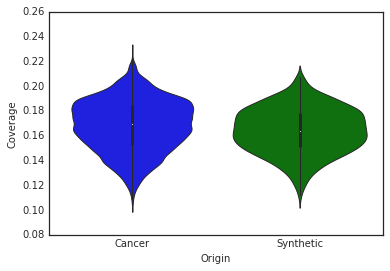

In [144]:
print 'Cancer:', synth_df[(synth_df.Class == 'I')&(synth_df.Origin == 'Cancer')].Coverage.mean()
print 'Synthetic:', synth_df[(synth_df.Class == 'I')&(synth_df.Origin == 'Synthetic')].Coverage.mean()
sns.violinplot(x='Origin', y='Coverage', data=synth_df[synth_df.Class == 'I'])

Cancer: 0.0711107146339
Synthetic: 0.0721946902655


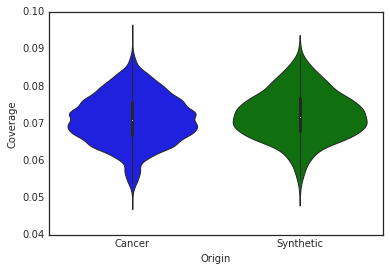

In [145]:
print 'Cancer:', synth_df[(synth_df.Class == 'II')&(synth_df.Origin == 'Cancer')].Coverage.mean()
print 'Synthetic:', synth_df[(synth_df.Class == 'II')&(synth_df.Origin == 'Synthetic')].Coverage.mean()
sns.violinplot(x='Origin', y='Coverage', data=synth_df[synth_df.Class == 'II'])

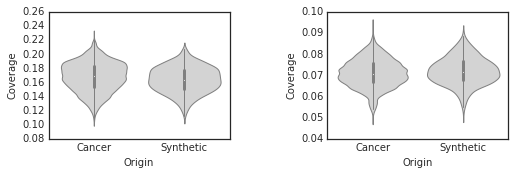

In [160]:
fig = plt.figure(figsize=(7.25, 2.5)) 
ax1 = plt.subplot2grid((1, 11), (0, 0), colspan=5)
sns.violinplot(x='Origin', y='Coverage', data=synth_df[synth_df.Class == 'I'],
              color='lightgrey')
plt.tight_layout()

ax2 = plt.subplot2grid((1, 11), (0, 6), colspan=5)
sns.violinplot(x='Origin', y='Coverage', data=synth_df[synth_df.Class == 'II'],
              color='lightgrey')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/susceptibility.synthetic.pdf')

How does their coverage compare?

In [148]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv',
                index_col=0)

In [149]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv',
                                index_col=0)
frequent_mutations = list(patient_mutations.sum().sort_values()[patient_mutations.sum().sort_values() >= 0].index)
print len(frequent_mutations)

1018


In [150]:
#classI_alt = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.alternate.classI.csv',
#                     index_col=0)
#classII_alt = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.alternate.csv',
#                     index_col=0)
classI_alt = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.alternate.classI.csv',
                     index_col=0),
                        pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.SRA.classI.csv',
                     index_col=0)])
classII_alt = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.alternate.csv',
                     index_col=0),
                       pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.SRA.csv',
                     index_col=0)])
classI_alt = classI_alt[frequent_mutations]
classII_alt = classII_alt[frequent_mutations]
tmp1 = pd.DataFrame(sum(classI_alt < 2, axis=1) / len(frequent_mutations) )
tmp1.columns = ['classI']
tmp2 = pd.DataFrame(sum(classII_alt < 10, axis=1) / len(frequent_mutations) )
tmp2.columns = ['classII']
print len(tmp1), len(tmp2)
df_alt = pd.merge(tmp1, tmp2, left_index=True, right_index=True, how='outer')

1386 1219


In [151]:
df_alt.to_csv('/cellar/users/ramarty/Data/hla_ii/hla_types/hla_types.alternate.all.csv')

In [152]:
df_alt.head()

,classI,classII
SRR1034682,0.529470,0.313360
SRR1034704,0.587426,0.309430
SRR1034717,0.587426,0.309430
SRR1034730,0.557957,0.328094
SRR1034743,0.566798,0.303536


In [153]:
df.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total,passenger_coverageI,passenger_coverageII,classI_cat,classII_cat,classI_het,classII_het
TCGA-DH-A7UV,0.494106,0.306483,LGG,49.0,WHITE,1.0,3.0,4.0,0.536184,0.341009,other,other,other,homo
TCGA-DH-A7UT,0.554028,0.320236,LGG,30.0,WHITE,1.0,1.0,2.0,0.530702,0.384868,high,other,other,het
TCGA-DH-A7UR,0.501965,0.310413,LGG,59.0,WHITE,0.0,0.0,0.0,0.514254,0.360746,other,other,het,het
TCGA-DH-A7US,0.441061,0.332024,LGG,50.0,WHITE,0.0,2.0,2.0,0.527412,0.382675,low,high,het,het
TCGA-DD-A4NB,0.482318,0.321218,LIHC,25.0,WHITE,0.0,0.0,0.0,0.493421,0.378289,low,other,het,het


In [154]:
df['cancer'] = 'yes'
df_alt['cancer'] = 'no'
df_all = pd.concat([df, df_alt])

With Cancer: 0.520628683694 5786
Without Cancer: 0.520628683694 1572
MannwhitneyuResult(statistic=3988952.0, pvalue=0.38222612220099361)


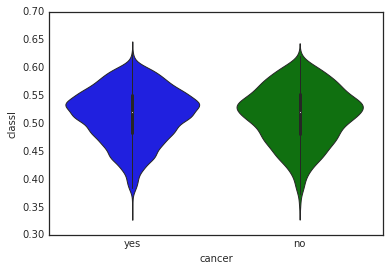

In [155]:
print "With Cancer:", df_all[df_all.cancer == 'yes'].classI.median(), len(df_all[df_all.cancer == 'yes'].classI)
print "Without Cancer:", df_all[df_all.cancer == 'no'].classI.median(), len(df_all[df_all.cancer == 'no'].classI)
print sp.mannwhitneyu(df_all[df_all.cancer == 'yes'].classI.dropna(),
                df_all[df_all.cancer == 'no'].classI.dropna())
sns.violinplot(x='cancer', y='classI', data=df_all)

With Cancer: 0.315617196716 5786
Without Cancer: 0.313775341636 1572
MannwhitneyuResult(statistic=3296780.0, pvalue=0.00017096526150541354)


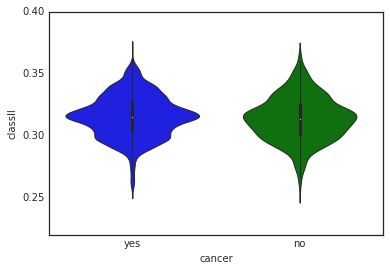

In [156]:
print "With Cancer:", df_all[df_all.cancer == 'yes'].classII.mean(), len(df_all[df_all.cancer == 'yes'].classII)
print "Without Cancer:", df_all[df_all.cancer == 'no'].classII.mean(), len(df_all[df_all.cancer == 'no'].classII)
print sp.mannwhitneyu(df_all[df_all.cancer == 'yes'].classII.dropna(),
                df_all[df_all.cancer == 'no'].classII.dropna())
sns.violinplot(x='cancer', y='classII', data=df_all)

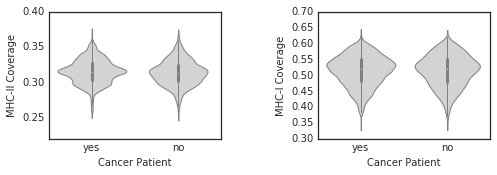

In [157]:
fig = plt.figure(figsize=(7, 2.5)) 
ax1 = plt.subplot2grid((1, 11), (0, 0), colspan=5)
sns.violinplot(x='cancer', y='classII', data=df_all,
              color='lightgrey')
plt.xlabel('Cancer Patient')
plt.ylabel('MHC-II Coverage')
plt.tight_layout()

ax2 = plt.subplot2grid((1, 11), (0, 6), colspan=5)
sns.violinplot(x='cancer', y='classI', data=df_all,
              color='lightgrey')
plt.xlabel('Cancer Patient')
plt.ylabel('MHC-I Coverage')
plt.tight_layout()

plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/susceptibility.non_cancer.pdf')

In [158]:
white_df = df_all[~df_all.Race.isin(list(df_all.Race.value_counts().index[1:]))]
print np.mean(df_all[df_all.cancer == 'yes'].classI), np.mean(df_all[df_all.cancer == 'no'].classI)
print np.mean(white_df[white_df.cancer == 'yes'].classI), np.mean(df_all[df_all.cancer == 'no'].classI)

print np.mean(df_all[df_all.cancer == 'yes'].classII), np.mean(df_all[df_all.cancer == 'no'].classII)
print np.mean(white_df[white_df.cancer == 'yes'].classII), np.mean(df_all[df_all.cancer == 'no'].classII)

0.514879422385 0.514382528626
0.516402733394 0.514382528626
0.315617196716 0.313775341636
0.31581901563 0.313775341636


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

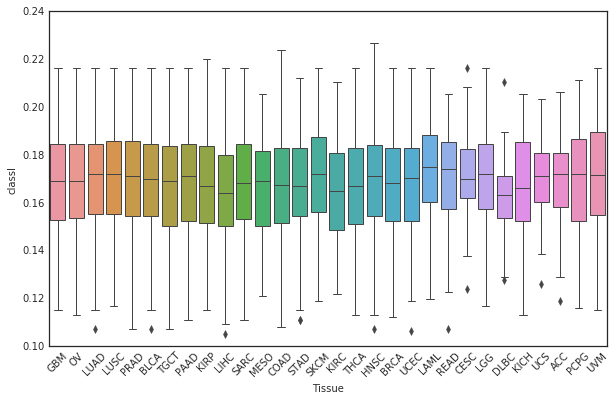

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='classI', data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

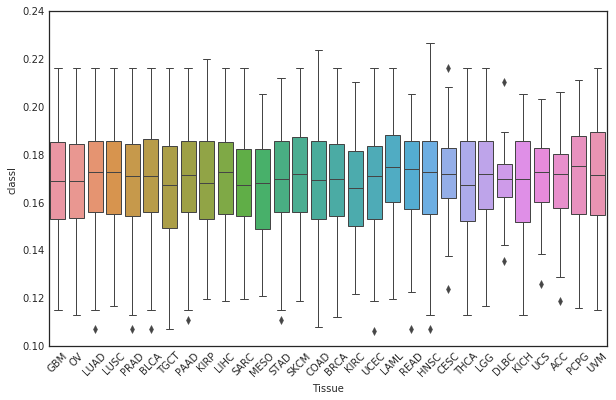

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='classI', data=white_df)
plt.xticks(rotation=45)

In [45]:
white_df.head()

,Age,Race,Tissue,cancer,classI,classII,classII_cat,classII_het,classI_cat,classI_het,homozygous_classI,homozygous_classII,homozygous_total
TCGA-02-0003,50.0,WHITE,GBM,yes,0.169941,0.073674,other,homo,other,homo,0.0,1.0,1.0
TCGA-02-0033,54.0,WHITE,GBM,yes,0.184676,0.066798,other,homo,high,homo,0.0,2.0,2.0
TCGA-02-0047,78.0,WHITE,GBM,yes,0.120825,0.085462,high,homo,low,het,2.0,1.0,3.0
TCGA-02-0055,62.0,WHITE,GBM,yes,0.152259,0.066798,other,homo,low,homo,0.0,2.0,2.0
TCGA-02-2466,61.0,WHITE,GBM,yes,0.181729,0.075639,other,homo,other,homo,0.0,1.0,1.0


In [46]:
for tissue in df_all.Tissue.unique():
    print tissue, sp.mannwhitneyu(white_df[white_df.Tissue == tissue].classI, 
                                  white_df[white_df.cancer == 'no'].classI)

GBM MannwhitneyuResult(statistic=74921.0, pvalue=0.3184833024511956)
OV MannwhitneyuResult(statistic=81690.0, pvalue=0.232904475463729)
LUAD MannwhitneyuResult(statistic=108315.0, pvalue=0.21457037160753134)
LUSC MannwhitneyuResult(statistic=96493.0, pvalue=0.20451986012902629)
PRAD MannwhitneyuResult(statistic=107612.0, pvalue=0.49643513308660198)
BLCA MannwhitneyuResult(statistic=74209.0, pvalue=0.24303896819801979)
TGCT MannwhitneyuResult(statistic=27340.0, pvalue=0.083140740163994975)
PAAD MannwhitneyuResult(statistic=34556.0, pvalue=0.36245650778250793)
KIRP MannwhitneyuResult(statistic=47370.0, pvalue=0.49466307921967251)
LIHC MannwhitneyuResult(statistic=40260.0, pvalue=0.25473153070766463)
SARC MannwhitneyuResult(statistic=32525.0, pvalue=0.19490728205406632)
MESO MannwhitneyuResult(statistic=16443.0, pvalue=0.15239251154573902)
COAD MannwhitneyuResult(statistic=71184.0, pvalue=0.34147630570067755)
STAD MannwhitneyuResult(statistic=72687.0, pvalue=0.33810150092390057)
SKCM Mann

In [47]:
for tissue in df_all.Tissue.unique():
    print tissue, sp.mannwhitneyu(white_df[white_df.Tissue == tissue].classII, 
                                  white_df[white_df.cancer == 'no'].classII)

GBM MannwhitneyuResult(statistic=74622.0, pvalue=0.28556244775669615)
OV MannwhitneyuResult(statistic=42990.0, pvalue=4.4494485943378425e-34)
LUAD MannwhitneyuResult(statistic=109761.0, pvalue=0.32763986904367265)
LUSC MannwhitneyuResult(statistic=86750.0, pvalue=0.00039751795250730882)
PRAD MannwhitneyuResult(statistic=99281.0, pvalue=0.020234726587251482)
BLCA MannwhitneyuResult(statistic=74268.0, pvalue=0.24885524069241466)
TGCT MannwhitneyuResult(statistic=29313.0, pvalue=0.41393270007530414)
PAAD MannwhitneyuResult(statistic=33850.0, pvalue=0.23347555670919451)
KIRP MannwhitneyuResult(statistic=42173.0, pvalue=0.010907539425672776)
LIHC MannwhitneyuResult(statistic=41556.0, pvalue=0.48371185086473834)
SARC MannwhitneyuResult(statistic=0.0, pvalue=8.9801764630337276e-77)
MESO MannwhitneyuResult(statistic=16973.0, pvalue=0.2741007433107)
COAD MannwhitneyuResult(statistic=61841.0, pvalue=0.00025857035357804186)
STAD MannwhitneyuResult(statistic=70730.0, pvalue=0.14691431422595952)
SK

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

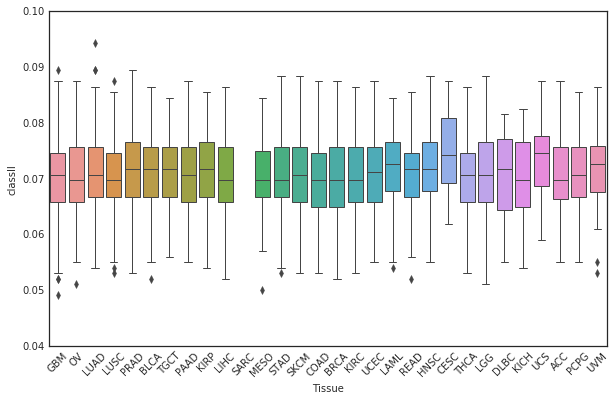

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='classII', data=white_df)
plt.xticks(rotation=45)